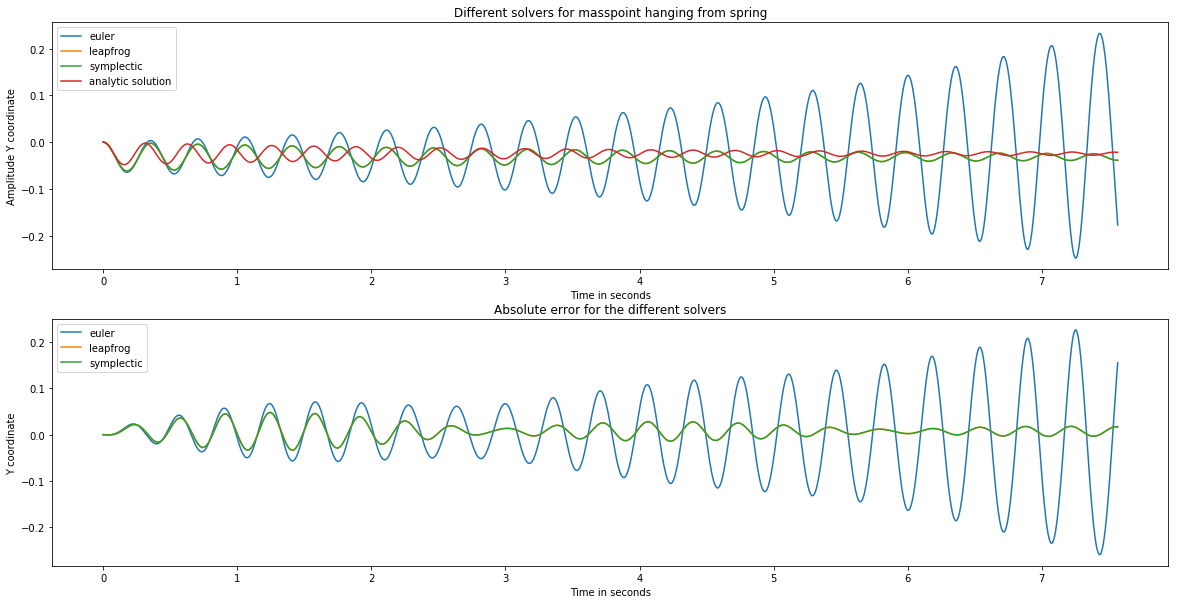

In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

step = 0.003
with open('euler.txt') as e:
    euler = [float(x.strip()) for x in e.readlines()]
with  open('lfrog.txt') as l:
    lfrog = [float(x.strip()) for x in l.readlines()]
    #leapfrog outputs twice the amount of steps, combine two adjacent as average
    lfrog = [(a + b) / 2 for a, b in zip(lfrog[::2], lfrog[1::2])]
with open('symp.txt') as s:
    symp = [float(x.strip()) for x in s.readlines()]
    
analyticSolution = np.vectorize(lambda t: 0.000327029 * np.exp(-0.266667*t) * sin(19.9982*t) 
                                + 0.024545 * np.exp(-0.266667*t) * cos(19.9982*t) - 0.024545)
    
#limit them to  the same length
min_len = min(len(euler), len(lfrog), len(symp))
euler = euler[:min_len]
lfrog = lfrog[:min_len]
symp = symp[:min_len]

timeSteps = np.arange(min_len) * step
analytic = analyticSolution(timeSteps)


plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Different solvers for masspoint hanging from spring')
plt.plot(timeSteps, euler, label='euler')
plt.plot(timeSteps, lfrog, label='leapfrog')
plt.plot(timeSteps, symp, label='symplectic')
plt.plot(timeSteps, analytic, label='analytic solution')
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude Y coordinate')
plt.legend()

plt.subplot(212)
plt.title('Absolute error for the different solvers')
plt.plot(timeSteps, analytic-euler, label='euler')
plt.plot(timeSteps, analytic-lfrog, label='leapfrog')
plt.plot(timeSteps, analytic-symp, label='symplectic')
plt.xlabel('Time in seconds')
plt.ylabel('Y coordinate')
plt.legend()

plt.show()
    

2523
